In [18]:
# import library

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam


In [19]:
# # import dataset

# from google.colab import drive

# drive.mount('/content/gdrive', force_remount=True)
# data_dir = '/content/gdrive/MyDrive/Colab Notebooks/skripsi/datasetv2'
# print(data_dir)

In [20]:
labels = ['batik-garutan', 'batik-lain']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [21]:
# Now we can easily fetch our train and validation data.

from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
train = get_data('/content/gdrive/MyDrive/Colab Notebooks/skripsi/datasetv2/train')
val = get_data('/content/gdrive/MyDrive/Colab Notebooks/skripsi/datasetv2/test')

Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


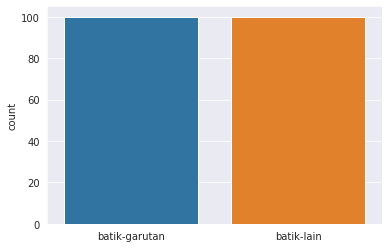

In [22]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("batik-garutan")
    else:
        l.append("batik-lain")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'batik-garutan')

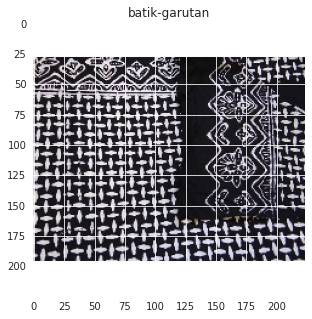

In [23]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'batik-lain')

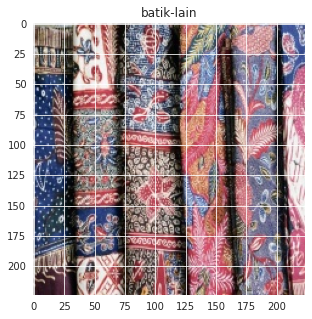

In [24]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [25]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [26]:
datagen = ImageDataGenerator(
    zoom_range = 0.3,
    horizontal_flip = True,
    vertical_flip=True,
    rotation_range=90)


datagen.fit(x_train)

In [27]:

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(224,224,3),
    pooling='max',
    classes=2,
    weights='imagenet'
    )

pretrained_model.trainable=False



In [28]:
resnet_model = Sequential()

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# base_learning_rate = 0.00001

# resnet_model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])
resnet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

history = resnet_model.fit(x_train,y_train,epochs = 100, validation_data = (x_val, y_val))

Epoch 1/100
7/7 [==============================] - 40s 5s/step - loss: 0.7499 - accuracy: 0.5550 - val_loss: 0.6146 - val_accuracy: 0.6600
Epoch 2/100
7/7 [==============================] - 36s 5s/step - loss: 0.5764 - accuracy: 0.7000 - val_loss: 0.5772 - val_accuracy: 0.7400
Epoch 3/100
7/7 [==============================] - 36s 5s/step - loss: 0.5616 - accuracy: 0.7000 - val_loss: 0.5617 - val_accuracy: 0.7800
Epoch 4/100
7/7 [==============================] - 36s 5s/step - loss: 0.5343 - accuracy: 0.7250 - val_loss: 0.5797 - val_accuracy: 0.7200
Epoch 5/100
7/7 [==============================] - 35s 5s/step - loss: 0.5039 - accuracy: 0.7300 - val_loss: 0.5512 - val_accuracy: 0.7600
Epoch 6/100
7/7 [==============================] - 35s 5s/step - loss: 0.4823 - accuracy: 0.7650 - val_loss: 0.5471 - val_accuracy: 0.8000
Epoch 7/100
7/7 [==============================] - 36s 5s/step - loss: 0.4581 - accuracy: 0.7850 - val_loss: 0.5513 - val_accuracy: 0.7800
Epoch 8/100
7/7 [==========

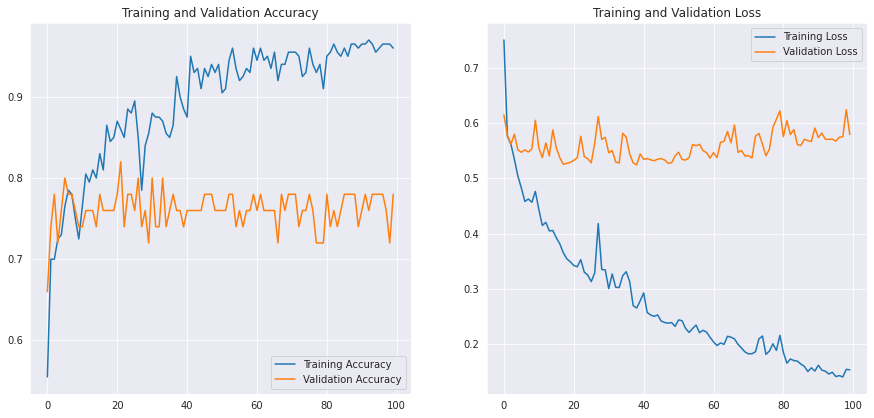

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
p_pred = resnet_model.predict(x_val)
p_pred = p_pred.reshape(1,-1)[0]
# p_pred = p_pred.flatten()
# print(p_pred.round(2))

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names = ['Batik Garutan','Batik Lain']))


[[18  7]
 [ 4 21]]
               precision    recall  f1-score   support

Batik Garutan       0.82      0.72      0.77        25
   Batik Lain       0.75      0.84      0.79        25

     accuracy                           0.78        50
    macro avg       0.78      0.78      0.78        50
 weighted avg       0.78      0.78      0.78        50

